In [1]:
import matplotlib.pyplot as plt
from core import MontecarloBlackjack, DummyAgent, NeuralNetworkAgent, QLearningAgent
from juego import Juego
from tqdm import tqdm

2024-01-04 17:26:04.970597: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 17:26:05.011890: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 17:26:05.012674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-04 17:26:05.794897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Q-Learning

In [2]:
def obtener_nuevo_estado(juego, accion):
    if accion == [1,0]:
        juego.jugador.actualizar_mano(juego.baraja.pop(0))
        return juego.estado.get_estado_codificado()
        
    elif accion == [0,1]:
        return juego.estado.get_estado_codificado()

In [3]:
def train(episodios):
    agente = QLearningAgent()
    resultados = []

    for _ in tqdm(range(episodios), desc="Entrenando Agente"):
        juego = Juego(agente)
        juego.setup()
        while not juego.is_terminal():
            if len(juego.baraja) < 1:
                juego.baraja = juego.new_deck()
            jugador_activo = juego.jugador_activo()
            estado_codificado = tuple(juego.estado.get_estado_codificado())
            accion = agente.get_action(estado_codificado)
            juego.realizar_accion(jugador_activo, accion)
        resultado_episodio = juego.get_resultados()
        if resultado_episodio:
            resultados.extend(resultado_episodio)
            for estado_codificado, accion, res in resultado_episodio:
                accion_str = 'HIT' if accion == [1, 0] else 'STAND'
                nuevo_estado = obtener_nuevo_estado(juego, accion)
                agente.update_q_table(estado_codificado, accion_str, res, nuevo_estado)
    return agente, resultados

In [4]:
agente, resultados = train(100)

Entrenando Agente: 100%|██████████| 100/100 [00:00<00:00, 17559.68it/s]

[[[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 1]]]
-1
[[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1]]]
1
[[[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1]]]
1
[[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1]]]
1
[[[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1]]]
1
[[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1]]]
-1


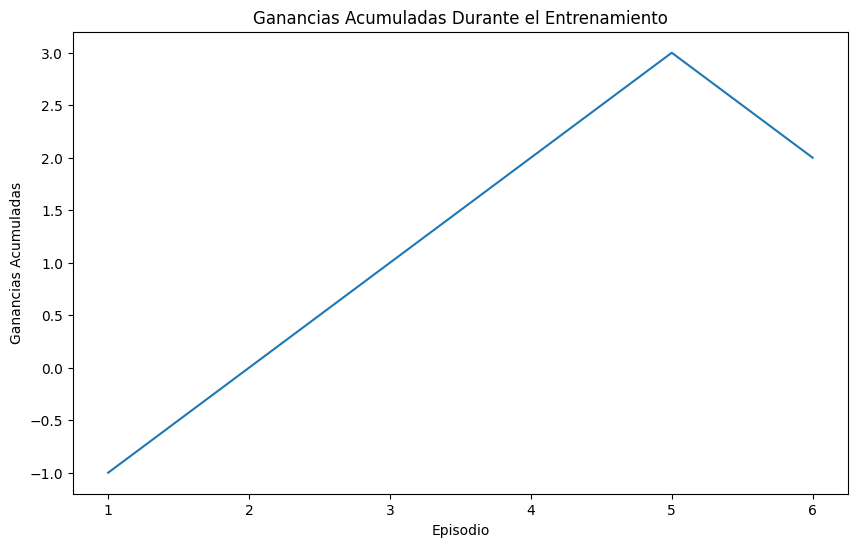

In [5]:
def plot_ganancias(resultados):
    ganancias_acumuladas = [sum(r[-1] for r in resultados[:i+1]) for i in range(len(resultados))]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(ganancias_acumuladas) + 1), ganancias_acumuladas)
    plt.title("Ganancias Acumuladas Durante el Entrenamiento")
    plt.xlabel("Episodio")
    plt.ylabel("Ganancias Acumuladas")
    plt.show()

plot_ganancias(resultados) 

In [6]:
ganancias = sum([r[-1] for r in resultados])
ganancias

2

2024-01-04 17:26:07.669925: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Simulando DummyAgent: 100%|██████████| 6/6 [00:00<00:00, 18183.40it/s]


[[[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1]]]
1
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1]]]
1


Simulando NeuralNetworkAgent:   0%|          | 0/6 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


Simulando NeuralNetworkAgent:  67%|██████▋   | 4/6 [00:00<00:00, 13.38it/s]

[[[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1]]]
1
1/1 [==============================] - 0s 13ms/step


Simulando NeuralNetworkAgent: 100%|██████████| 6/6 [00:00<00:00, 15.90it/s]


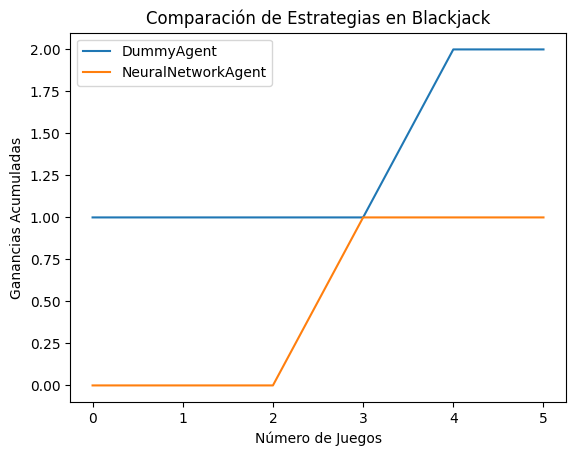

In [7]:
# Suponiendo que tienes la clase Juego y las clases de agentes definidas
dummy_agent = DummyAgent()
neural_network_agent = NeuralNetworkAgent(28)

simulador = MontecarloBlackjack({'DummyAgent': dummy_agent, 'NeuralNetworkAgent': neural_network_agent}, 6, False)
simulador.simular()
simulador.plot_resultados()